Tasks:
1. Build a model of housing price to predict median house values in California using the provided dataset.
2. Train the model to learn from the dataset and predict median housing price in any district, gievn all other metrics. 
3. Predict housing price based on median_income and plot regression chart.
4. Perform linear regression with one independent variable

In [6]:
# Import the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#1. Read from housing.cvs
housingDF = pd.read_excel("housing.xlsx")

#Print the first 5 head rows
housingDF.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [13]:
#2. Fill the missing value with mean value 
housingDF.isnull().sum()
housingDF.isna().sum()
(housingDF['total_bedrooms'])[np.isnan(housingDF['total_bedrooms'])]= (housingDF['total_bedrooms']).mean()
housingDF.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [8]:
#Categorical data conversion from non-numerical to numerical value
housingDF.info() # only column ocean_proximity is non-numerical and hence needs to be converted
housingDF.dtypes
housingDF.ocean_proximity.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
#3. Encoding ocean_proximity column
housingDFEncoded = pd.get_dummies(housingDF, columns=['ocean_proximity'], drop_first=True)
housingDFEncoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [34]:
#Extract input X and output Y
x = housingDFEncoded.drop(columns=['median_house_value'], axis=1) 
y = housingDFEncoded['median_house_value']

In [35]:
#4. Split the dataset into 80% training data and 20% test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
#5. Standardize data
#using Min Max scalling. Scalling is to be performed on the train and test data.

scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)
print(scaled_x_train)
print(scaled_x_test)

[[0.72908367 0.01702128 0.62745098 ... 0.         0.         1.        ]
 [0.61653386 0.12978723 0.94117647 ... 0.         0.         1.        ]
 [0.38545817 0.22446809 0.05882353 ... 0.         0.         1.        ]
 ...
 [0.59462151 0.15744681 0.68627451 ... 0.         0.         0.        ]
 [0.23804781 0.53510638 0.2745098  ... 0.         0.         0.        ]
 [0.19223108 0.55531915 1.         ... 0.         1.         0.        ]]
[[0.53187251 0.37340426 0.47058824 ... 0.         0.         0.        ]
 [0.48705179 0.27553191 0.56862745 ... 0.         0.         0.        ]
 [0.19023904 0.55851064 1.         ... 0.         1.         0.        ]
 ...
 [0.22908367 0.50638298 0.47058824 ... 0.         0.         0.        ]
 [0.45717131 0.44893617 0.68627451 ... 0.         0.         0.        ]
 [0.59561753 0.17765957 0.31372549 ... 0.         0.         0.        ]]


In [42]:
#6. Perform linear regression
model = LinearRegression()
model.fit(scaled_x_train, y_train)

LinearRegression()

In [44]:
#6. Predict output for test data using the fitted model
y_test_prediction = model.predict(scaled_x_test)
y_test_prediction

array([ 64629.45079786, 134799.34083607, 266063.38139054, ...,
       439180.98341181, 120797.55240621, 183386.04993584])

In [45]:
#6. print RMSE from liner regression
rmse_score = (mean_squared_error(y_test,y_test_prediction)**.5)
rmse_score

70031.41991955663

In [46]:
#7. Extract median_income comulns from independent x_train and x_test

single_x_train = x_train[['median_income']]
single_x_test = x_test[['median_income']]

In [47]:
#7 perform linear regression
singleModel = LinearRegression()
singleModel.fit(single_x_train, y_train)

LinearRegression()

In [49]:
#7 predict output for test data
single_y_predict_train= singleModel.predict(single_x_train)
single_y_predict_test = singleModel.predict(single_x_test)
single_y_predict_test

array([114958.91676996, 150606.88213964, 190393.71844449, ...,
       431500.77230409, 161245.49973085, 193412.95560084])

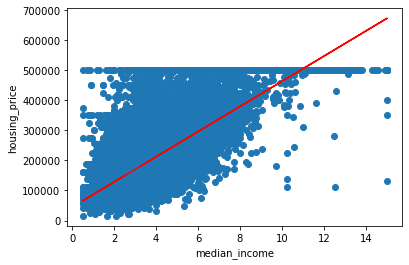

In [50]:
#7 Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data
plt.scatter(single_x_train, y_train)
plt.plot(single_x_train, single_y_predict_train, color='red')
plt.xlabel('median_income')
plt.ylabel('housing_price')
plt.show()